In [8]:
using Pkg

projectdir_static = dirname(Base.active_project())

projectdirx(args...) = joinpath(projectdir_static, args...)

# Generate functions to access the path of default subdirectories.
for dir_type ∈ ("data", "src", "plots", "scripts", "papers")
    function_name = Symbol(dir_type * "dirx")
    @eval begin
        $function_name(args...) = projectdirx($dir_type, args...)
    end
end

using DrWatson

@quickactivate "TissueRigidity"
 
projectname()

"TissueRigidity"

In [9]:
using DifferentialEquations
using StatsBase
using CairoMakie
using XLSX
using DataFrames
using Optimization, OptimizationPolyalgorithms, SciMLSensitivity,OptimizationOptimJL,OptimizationBBO,OptimizationNOMAD

In [10]:
include(srcdirx("Plotting&Utility.jl"))
include(srcdirx("FittingFunctions.jl"))

include(srcdirx("NodalLefty_NewTerm.jl"))

exp_name = "NodalLefty_DiffusionDominated_Zena_Set1"

include(srcdirx("ExperimentSetups/" * exp_name * ".jl"))

include(scriptsdirx("LoadData.jl"));

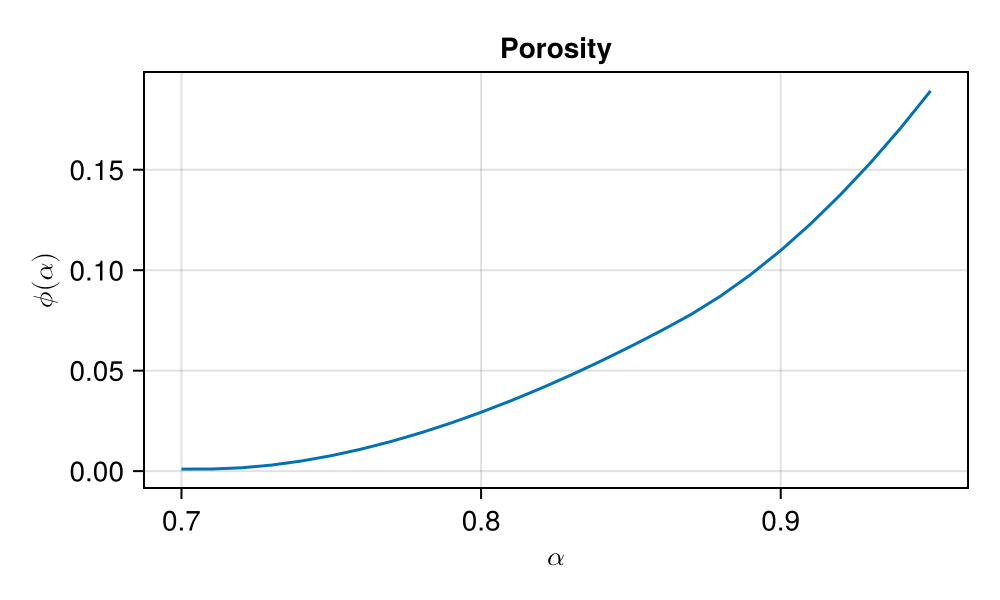

In [11]:
α_range = 0.7:0.01:0.95

fig = Figure(size = (500,300))
ax1 = Axis(fig[1,1],title = "Porosity",ylabel = L"\phi(\alpha)",xlabel = L"\alpha")

lines!(ax1, α_range,[ϕ(α) for α in α_range])

fig

In [12]:
p_orig,p_cp_orig,p_lm_orig = get_params(pv_orig)

tspan = (0,Inf)

u0 = ones(Nc,4)

u0[:,1] .= 1e-10
u0[:,2] .= 1e-10
u0[:,3] .= 0.
u0[:,4] .= α0

prob = ODEProblem(nodal_lefty_spatial_diff!,u0,tspan,p_orig)

ODEProblem with uType Matrix{Float64} and tType Float64. In-place: true
timespan: (0.0, Inf)
u0: 300×4 Matrix{Float64}:
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 ⋮                      
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586
 1.0e-10  1.0e-10  0.0  0.881586

In [13]:
# orig_metrics = get_summary_metrics(pv_orig,prob,data,alpha_data)

orig_metrics = get_summary_metrics(pv_orig,prob,data,alpha_data,0.2)

(wt_t0 = 4121.388648272594, cp_t0 = 5769.944107581631, wt_xMax = 103.34448160535118, cp_xMax = 165.55183946488293, lm_xMax = 300.0, wt_d0 = 0.0970873786407767, cp_d0 = 0.4848484848484849, lm_d0 = 1.0, xmax_peak_ratio = 1.4, xmax_mse = (0.929448037485787, 1.6209796711082072), xmax_mse_half = (0.929448037485787, 1.304618039094754), alpha_mse = 0.0008864809491219235, cp_lprod_t0 = 3997.623223399543, wt_lprod_t0 = 3032.252909389746, inc_met = (571.9221483592322, [210.54742516107464, -0.024230361787791956]), λhalf_max_t = 1942.5516969513674, λhalf_max_t_ro = 1673.2062935925642, IF_Δ = (0.08880029518064247, 0.005890558004653463), retcodes = (SciMLBase.ReturnCode.Terminated, SciMLBase.ReturnCode.Terminated, SciMLBase.ReturnCode.Terminated))

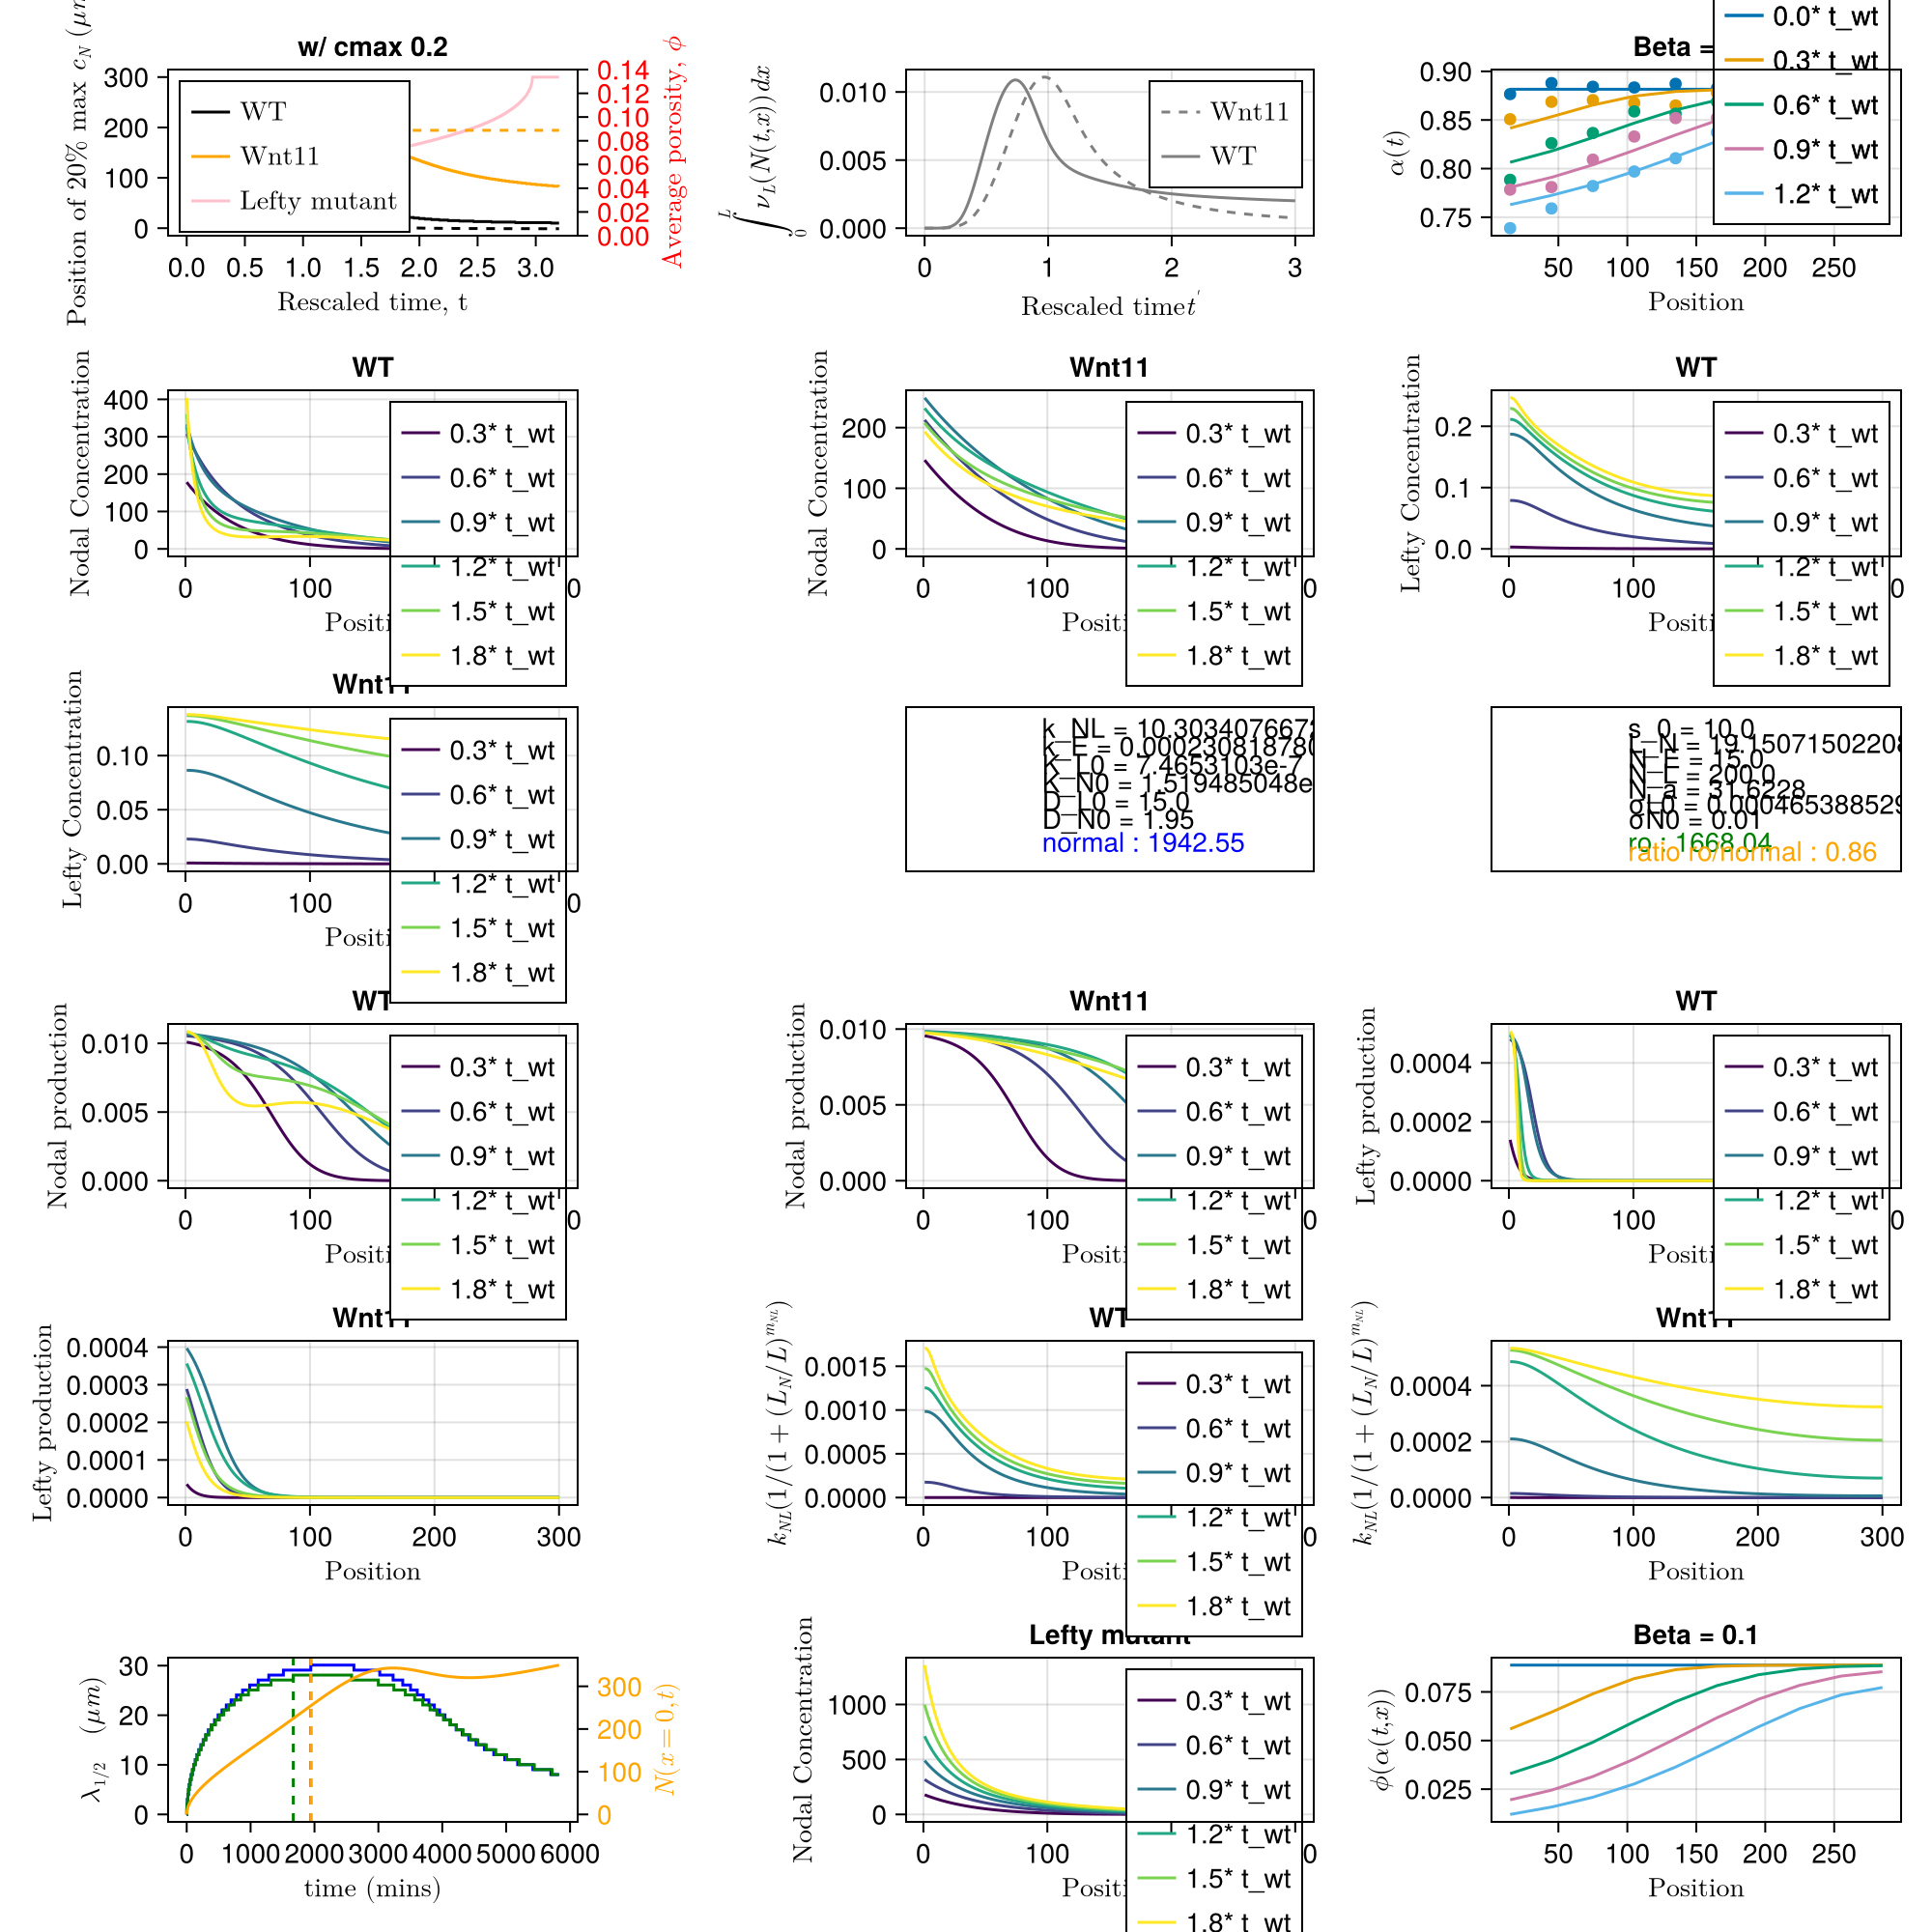

In [14]:
fig = Figure(size = (1200,1200))

fig = plot_summary_newtimes!(fig,[DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,NL,NE,LN,s0],prob)

fig

In [ ]:
# if you want to save the figure

save(plotsdir(exp_name * "_summary.pdf"),fig)